In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

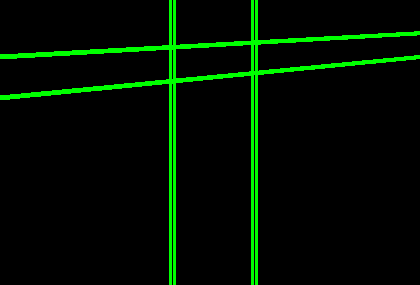

-1

In [ ]:
##### 그리기 위한 함수
def drawhoughLinesOnImage(image, houghLine):
  for line in houghLine:
    for rho, theta in line:
      a = np.cos(theta)
      b = np.sin(theta)
      x0 = a*rho
      y0 = b*rho
      x1 = int(x0 + 1000 * (-b))
      y1 = int(y0 + 1000 * (a))
      x2 = int(x0 - 1000 * (-b))
      y2 = int(x0 - 1000 * (a))

    cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

def draw_circle(houghImage, circle):
  for co, i, in enumerate(circle[0, :], start=1):
    cv2.circle(img, (i[0], i[1], i[2], (255, 0, 255), 3))

# Different weights are added to the image to give a feeling of blending
# 1.0 == 1.
def blend_images(image, final_image, alpha=0.7, beta-1., gamma=0.):
  return

# 1. 이미지 불러오기
image = cv2.imread('test02.png')

# 2. grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# 3. 가우시안 블러 적용
blurredImage = cv2.GaussianBlur(gray_image, (5,5), 0)
edgeImage = cv2.Canny(blurredImage, 50, 120)

# 4. Detect points that form a line
dis_reso = 1 # Distance resolution in pixels of the Hough grid
theta = np.pi / 180
threshold = 170

houghLine = cv2.HoughLines(edgeImage, dis_reso, theta, threshold)
circles = cv2.HoughCircles(
    blurredImage, method=cv2.HOUGH_GRADIENT, dp=0.7, minDist=12,
    param1=70, param2=80)

# 5. Create and empty image
houghImage = np.zeros_like(image)

drawhoughLinesOnImage(houghImage, houghLine)
draw_circle(houghImage, circles)

originalImageWithHough = blend_images(houghImage, image)
cv2_imshow(originalImageWithHough)





cv2_imshow(houghImage)
cv2.waitKey(0)